# This script takes normalized metagenome read counts mapped to KOs (genes) and displays the relative abundances of all relevant (non-eukaryotic) gene categories as a heat map.

In [1]:
import os as os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/npatin3/miniconda/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir('/Users/npatin3/Dropbox (GaTech)/Norovirus/Annotation/kofamscan/Assemblies/Asymp_vs_symp')

In [3]:
path = "Asymp_vs_symp_KOs_readcounts.csv"

In [4]:
kos = pd.read_csv(path, header=0) ## names=['Group','Subgroup1','Subgroup2','KO','gene','read_count','Sample',
                                            ## 'GE','ReadCount_Norm','dataset'])
kos.head()

,Group,Subgroup,Subgroup2,KO,Function,ReadCounts,Sample,GE,ReadCounts_Norm,dataset
0,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis [PATH:ko00010],K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic
1,Metabolism,Carbohydrate metabolism,Fructose and mannose metabolism [PATH:ko00051],K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic
2,Metabolism,Carbohydrate metabolism,Galactose metabolism [PATH:ko00052],K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic
3,Metabolism,Carbohydrate metabolism,Starch and sucrose metabolism [PATH:ko00500],K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic
4,Metabolism,Carbohydrate metabolism,Amino sugar and nucleotide sugar metabolism [P...,K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic


In [5]:
kos2 = kos.loc[(kos['Group'] != 'Human Diseases') & 
               (kos['Group'] != 'Brite Hierarchies') & 
               (kos['Group'] != 'Organismal Systems') &
               (kos['Subgroup'] != 'Cellular community - eukaryotes')]

In [6]:
kos['Sample'].unique()

array(['13_1', '28_1', '41_1', '38_1', '49_1', '15_1', '36_1', '37_1',
       '4_1'], dtype=object)

In [7]:
kos2['Sample'].unique()

array(['13_1', '28_1', '41_1', '38_1', '49_1', '15_1', '36_1', '37_1',
       '4_1'], dtype=object)

### Sanity check: kos2 should be smaller than kos

In [8]:
kos.size

235930

In [9]:
kos2.size

146530

#### Select only relevant columns for heat map

In [10]:
df = kos2[['Subgroup','Sample','ReadCounts_Norm', 'dataset']]
df.head()

,Subgroup,Sample,ReadCounts_Norm,dataset
0,Carbohydrate metabolism,13_1,0.001825,Asymptomatic
1,Carbohydrate metabolism,13_1,0.001825,Asymptomatic
2,Carbohydrate metabolism,13_1,0.001825,Asymptomatic
3,Carbohydrate metabolism,13_1,0.001825,Asymptomatic
4,Carbohydrate metabolism,13_1,0.001825,Asymptomatic


## Final format for clustermap

In [11]:
df3 = pd.pivot_table(data=df, index='Sample', values='ReadCounts_Norm', columns='Subgroup')
df3 = df3.fillna(0)
df3.head()

Subgroup,Amino acid metabolism,Biosynthesis of other secondary metabolites,Carbohydrate metabolism,Cell growth and death,Cell motility,Cellular community - prokaryotes,Energy metabolism,"Folding, sorting and degradation",Glycan biosynthesis and metabolism,Lipid metabolism,...,Replication and repair,Signal transduction,Signaling molecules and interaction,Transcription,Translation,Transport and catabolism,Unclassified: genetic information processing,Unclassified: metabolism,Unclassified: signaling and cellular processes,Xenobiotics biodegradation and metabolism
Sample,,,,,,,,,,,,,,,,,,,,,
13_1,0.006361,0.009988,0.009682,0.014294,0.004562,0.008657,0.007050,0.011601,0.015815,0.012235,...,0.013536,0.010379,0.003650,0.013382,0.006819,0.009489,0.011012,0.009026,0.009286,0.007391
15_1,0.007658,0.007492,0.011866,0.008033,0.005845,0.011433,0.007059,0.005306,0.014328,0.006675,...,0.011355,0.007947,0.003082,0.003866,0.007236,0.006053,0.018929,0.009680,0.018473,0.005955
28_1,0.004505,0.004417,0.006677,0.008741,0.005959,0.005108,0.006171,0.007790,0.012162,0.008954,...,0.009081,0.004744,0.002384,0.014700,0.005364,0.010429,0.012305,0.005120,0.005710,0.003392
36_1,0.007446,0.009196,0.010864,0.005428,0.004614,0.011217,0.007908,0.005331,0.008843,0.006319,...,0.011482,0.009824,0.004768,0.004308,0.005823,0.007020,0.016615,0.010462,0.023685,0.009360
37_1,0.007433,0.007486,0.012043,0.007190,0.005632,0.009459,0.006874,0.005041,0.010710,0.006832,...,0.010154,0.010866,0.004768,0.004951,0.006510,0.006385,0.014113,0.011438,0.022896,0.009209


## Set palette for color bar

In [14]:
my_palette = dict(zip(df.dataset.unique(), ["red","green"]))
row_colors = df.dataset.map(my_palette)
sampz = df.Sample

In [15]:
sample_colors = sampz.to_frame().join(row_colors)
sample_colors = sample_colors.drop_duplicates(subset=['Sample'])
sample_colors = sample_colors.set_index('Sample')
sample_colors.head()

,dataset
Sample,
13_1,red
28_1,red
41_1,red
38_1,red
49_1,red


## Make the heatmap

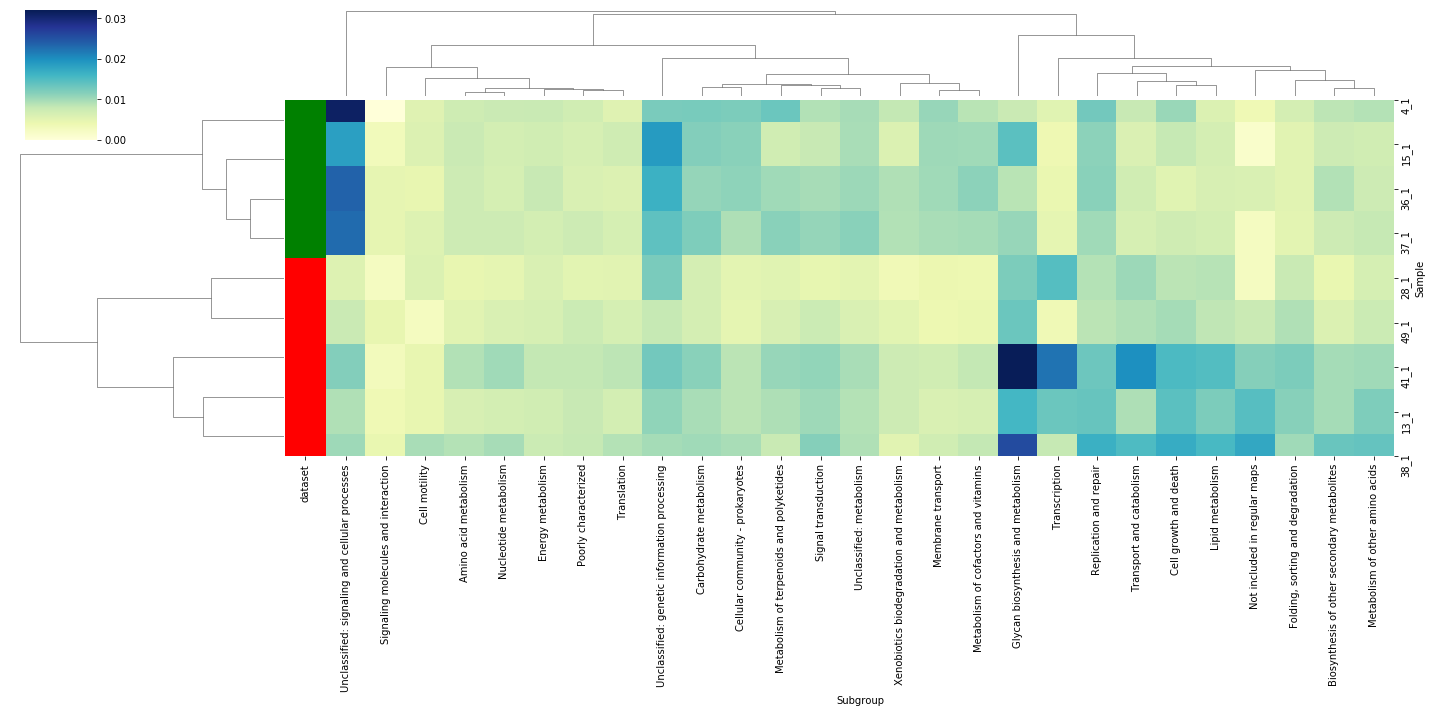

In [16]:
p = sns.clustermap(df3, cmap='YlGnBu', figsize=(20,10), xticklabels=True, method='ward', metric='euclidean', row_colors = sample_colors)

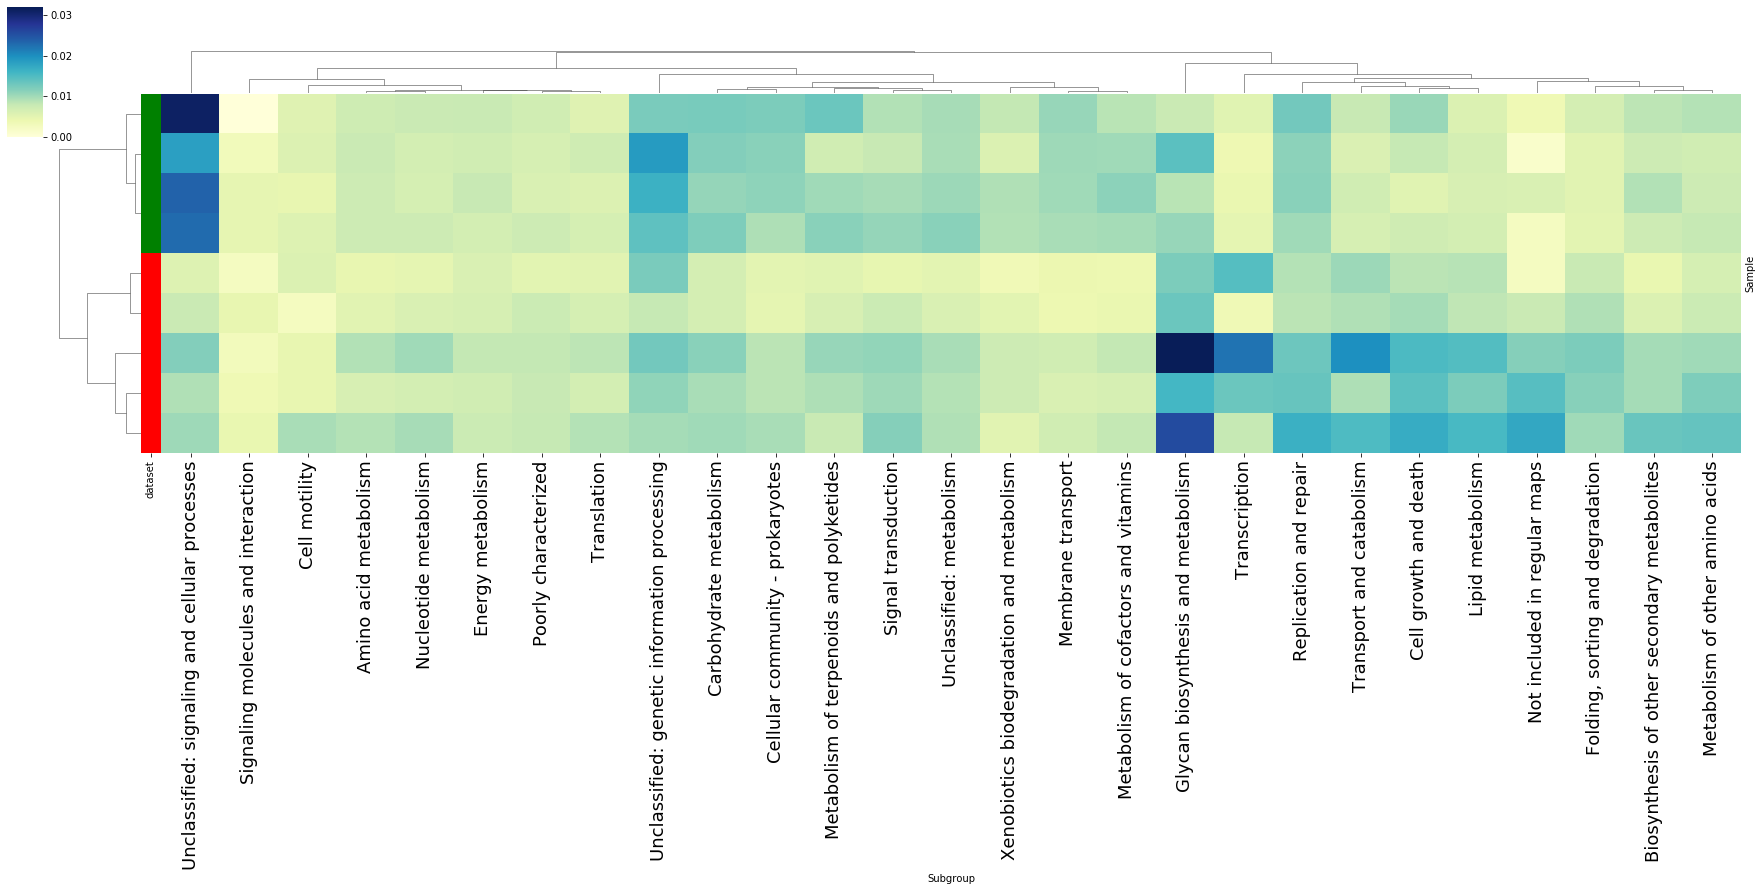

In [19]:
p = sns.clustermap(df3, cmap='YlGnBu', method='ward', metric='euclidean', xticklabels=True, yticklabels=False, row_colors = sample_colors)
hm = p.ax_heatmap.get_position()
plt.setp(p.ax_heatmap.yaxis.get_majorticklabels(), fontsize=12)
plt.setp(p.ax_heatmap.xaxis.get_majorticklabels(), fontsize=18)
p.ax_heatmap.set_position([hm.x0, hm.y0, hm.width*3, hm.height])
col = p.ax_col_dendrogram.get_position()
row = p.ax_row_dendrogram.get_position()
p.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*3, col.height*0.5])
p.ax_row_dendrogram.set_position([row.x0+0.07, row.y0, row.width*0.75, row.height])

In [20]:
p.savefig("Baselines_subgroups_raw_clustermap.png")

### Retrieve heat map clusters

In [43]:
import scipy.cluster.hierarchy as sch

In [49]:
df3T = df3_log.T

In [51]:
# retrieve clusters using fcluster 
d = sch.distance.pdist(df3T)
L = sch.linkage(d, method='complete')
# 0.2 can be modified to retrieve more stringent or relaxed clusters
clusters = sch.fcluster(L, 0.2*d.max(), 'distance')

In [78]:
# retrieve clusters using fcluster 
d = sch.distance.pdist(df3_log)
L = sch.linkage(d, method='complete')
# 0.2 can be modified to retrieve more stringent or relaxed clusters
clusters = sch.fcluster(L, 0.9*d.max(), 'distance')

In [79]:
# clusters indicices correspond to incides of original df
for i,cluster in enumerate(clusters):
    print(df3_log.index[i], cluster)

13_1 1
15_1 2
28_1 1
36_1 2
37_1 2
38_1 1
41_1 1
4_1 1


In [81]:
plt.figure(figsize=(10, 8))
plt.scatter(df3T[:,0], df3T[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

<Figure size 720x576 with 0 Axes>